# Notwendige Pakete

In [87]:
#!pip install seaborn

In [88]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Hintergrundinformationen

Bike-Sharing-Systeme sind ein Mittel zum Mieten von Fahrrädern, bei denen der Prozess der Mitgliedschaft, des Verleihs und der Fahrradrückgabe über ein Netzwerk von Kioskstandorten in der ganzen Stadt automatisiert wird. Mit diesen Systemen können Menschen ein Fahrrad an einem Ort mieten und es bei Bedarf an einem anderen Ort zurückgeben. Derzeit gibt es weltweit über 500 Bike-Sharing-Programme.

Die von diesen Systemen generierten Daten machen sie für Forscher attraktiv, da Reisedauer, Abfahrtsort, Ankunftsort und verstrichene Zeit explizit erfasst werden. Bike-Sharing-Systeme fungieren somit als Sensornetzwerk, mit dem die Mobilität in einer Stadt untersucht werden kann. Bei diesem Wettbewerb werden die Teilnehmer gebeten, historische Nutzungsmuster mit Wetterdaten zu kombinieren, um die Fahrradmietnachfrage im Rahmen des Capital Bikeshare-Programms in Washington, DC, zu prognostizieren.

http://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand


## Variable Explanations

| Variable |Explanation |
| --- | --- |
| Date | year-month-day |
|Rented Bike count | Count of bikes rented at each hour |
| Hour | Hour of the day |
| Temperature | Temperature in Celsius |
| Humidity | % |
| Windspeed | m/s |
| Visibility | 10m |
| Dew point temperature | Celsius |
| Solar radiation | MJ/m2 |
| Rainfall | mm |
| Snowfall | cm |
| Seasons | Winter, Spring, Summer, Autumn |
| Holiday | Holiday/No holiday |
| Functional Day | NoFunc(Non Functional Hours), Fun(Functional hours) |



# Daten einlesen

In [89]:
url_bikes = "https://archive.ics.uci.edu/ml/machine-learning-databases/00560/SeoulBikeData.csv"
df = pd.read_csv(url_bikes, encoding="latin")

In [90]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


# Daten-Verständnis

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [92]:
df.describe()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
count,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000
mean,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068
std,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746
min,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000
25%,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000
50%,504.500000,11.500000,13.700000,57.000000,1.500000,1698.000000,5.100000,0.010000,0.000000,0.000000
75%,1065.250000,17.250000,22.500000,74.000000,2.300000,2000.000000,14.800000,0.930000,0.000000,0.000000
max,3556.000000,23.000000,39.400000,98.000000,7.400000,2000.000000,27.200000,3.520000,35.000000,8.800000


In [93]:
df.describe(exclude = 'number')

,Date,Seasons,Holiday,Functioning Day
count,8760,8760,8760,8760
unique,365,4,2,2
top,01/12/2017,Spring,No Holiday,Yes
freq,24,2208,8328,8465


**Frage:** Warum gucken wir uns das an? (count, min, max, mean vs. median, std)

**Frage:** Was fällt uns auf? (Hour, Snowfall)

## Visualisierung einzelner Größen


### Numerische Größen gegen die Zeit plotten

<Axes: xlabel='Date'>

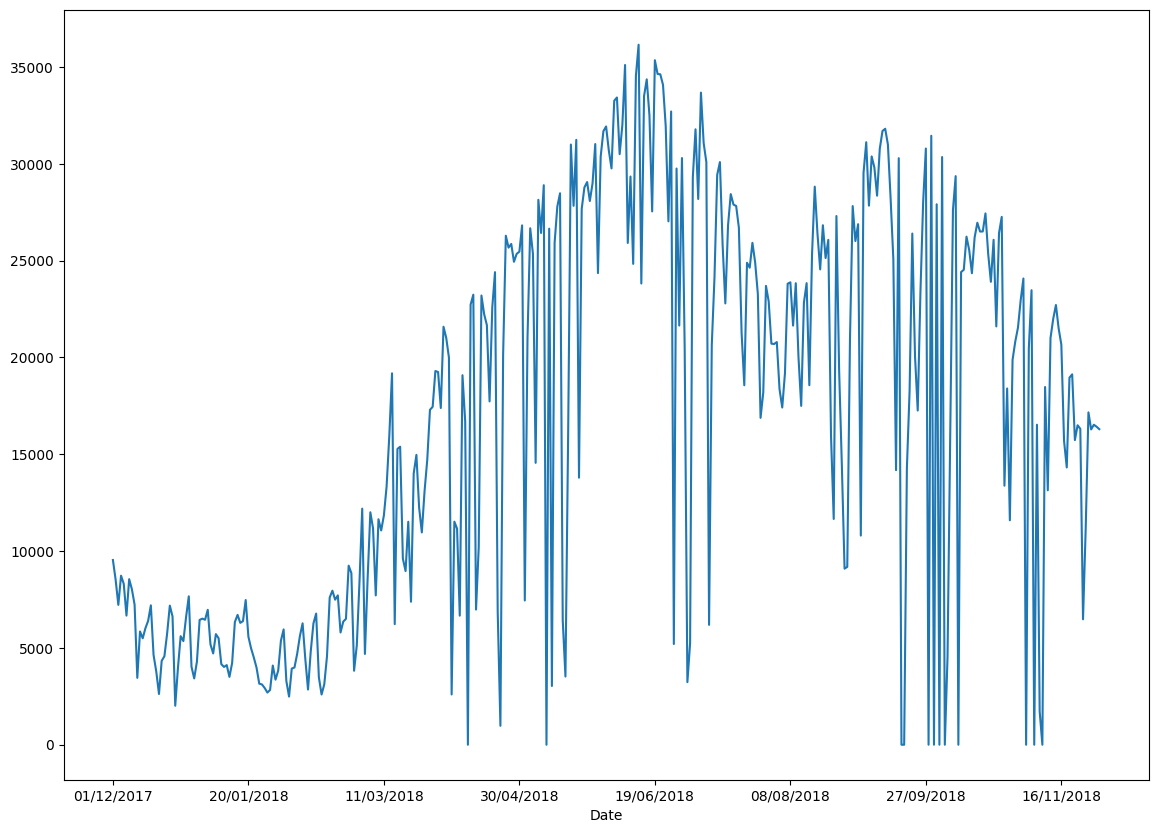

In [94]:
df_daily = df[['Date', 'Rented Bike Count']].groupby('Date').sum("Rented Bike Count")
df_daily['Datum'] = df_daily.index
df_daily['Datum'] = pd.to_datetime(df_daily['Datum'], format = '%d/%m/%Y')
df_daily = df_daily.sort_values(by = 'Datum')
df_daily.tail(10)
df_daily['Rented Bike Count'].plot(figsize=(14,10))

### Target

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rented Bike Count', ylabel='Count'>

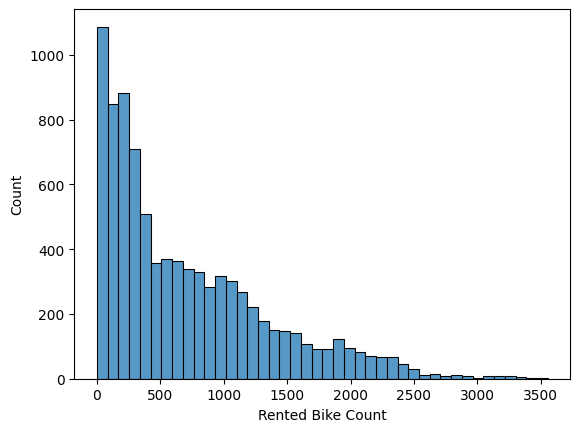

In [95]:
#df['Rented Bike Count'].hist()
sns.histplot(data = df, x = 'Rented Bike Count')

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rented Bike Count', ylabel='Count'>

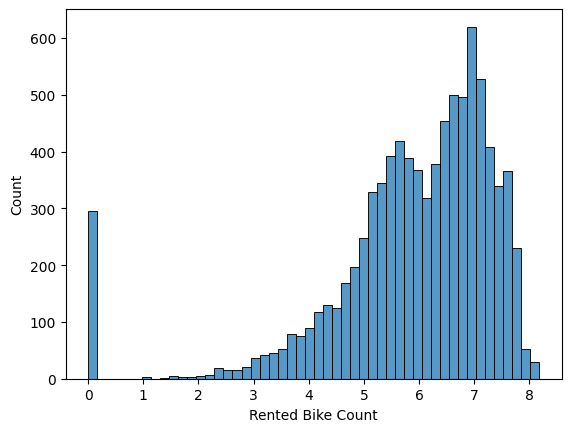

In [96]:
sns.histplot(np.log(df['Rented Bike Count'] +1))

In [97]:
df[df['Rented Bike Count'] == 0].describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
count,295,295.0,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.000000,295.0,295,295,295
unique,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,1
top,11/04/2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Autumn,No Holiday,No
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,247,271,295
mean,NaN,0.0,11.298305,16.092881,60.494915,1.696949,1521.542373,7.770169,0.604780,0.136271,0.0,NaN,NaN,NaN
std,NaN,0.0,6.979501,4.690414,16.331779,1.094120,580.913593,4.373466,0.883754,1.203795,0.0,NaN,NaN,NaN
min,NaN,0.0,0.000000,5.200000,21.000000,0.000000,201.000000,-7.000000,0.000000,0.000000,0.0,NaN,NaN,NaN
25%,NaN,0.0,5.000000,12.300000,49.000000,0.900000,1055.000000,5.300000,0.000000,0.000000,0.0,NaN,NaN,NaN
50%,NaN,0.0,11.000000,16.300000,62.000000,1.500000,1814.000000,7.800000,0.000000,0.000000,0.0,NaN,NaN,NaN
75%,NaN,0.0,17.000000,19.350000,73.000000,2.350000,2000.000000,11.000000,1.065000,0.000000,0.0,NaN,NaN,NaN


In [98]:
df[df['Rented Bike Count'] == 0].groupby('Date').agg({'Hour': 'nunique'})
df[df['Rented Bike Count'] == 0].drop(["Seasons", "Holiday", "Functioning Day"], axis=1).groupby('Date').agg('mean')
# Fazit: drop data if df['Rented Bike Count'] == 0 den ganzen Tag lang (24 mal mit gleichem Date) --> Functioning Date
aux = df[df['Rented Bike Count'] == 0].groupby('Date').agg({'Hour': 'nunique'})
Dates_closed = list(aux[aux['Hour'] == 24].index)
Dates_closed

['02/10/2018',
 '03/11/2018',
 '04/10/2018',
 '06/11/2018',
 '09/10/2018',
 '09/11/2018',
 '10/05/2018',
 '11/04/2018',
 '18/09/2018',
 '19/09/2018',
 '28/09/2018',
 '30/09/2018']

In [99]:
closed = lambda x: x in Dates_closed
df['closed'] = df['Date'].apply(closed)
df[df['Rented Bike Count'] == 0]#[df['Date'] == '06/10/2018']

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,closed
3144,11/04/2018,0,0,14.4,82,4.6,1041,11.3,0.0,0.0,0.0,Spring,No Holiday,No,True
3145,11/04/2018,0,1,13.6,81,3.6,886,10.3,0.0,0.0,0.0,Spring,No Holiday,No,True
3146,11/04/2018,0,2,12.7,80,3.9,885,9.3,0.0,0.0,0.0,Spring,No Holiday,No,True
3147,11/04/2018,0,3,11.6,81,3.1,687,8.4,0.0,0.0,0.0,Spring,No Holiday,No,True
3148,11/04/2018,0,4,10.2,83,3.5,554,7.4,0.0,0.0,0.0,Spring,No Holiday,No,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8251,09/11/2018,0,19,11.9,71,2.7,589,6.7,0.0,0.0,0.0,Autumn,No Holiday,No,True
8252,09/11/2018,0,20,11.9,72,2.5,526,7.0,0.0,0.0,0.0,Autumn,No Holiday,No,True
8253,09/11/2018,0,21,11.4,74,1.9,498,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,True
8254,09/11/2018,0,22,11.2,75,1.7,478,6.9,0.0,0.0,0.0,Autumn,No Holiday,No,True


/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Rented Bike Count', ylabel='Count'>

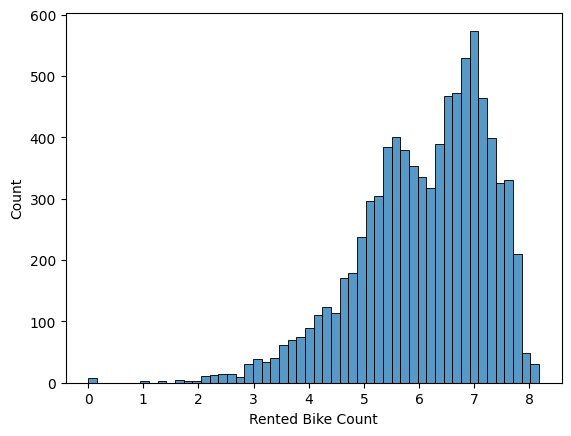

In [100]:
sns.histplot(np.log( df[ df['closed'] == False]['Rented Bike Count'] +1))

In [101]:
df = df[ df['closed'] == False]
df = df.drop(columns = 'closed')

### Pairplot: Target vs. Numerische Größen

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8472 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8472 non-null   object 
 1   Rented Bike Count          8472 non-null   int64  
 2   Hour                       8472 non-null   int64  
 3   Temperature(°C)            8472 non-null   float64
 4   Humidity(%)                8472 non-null   int64  
 5   Wind speed (m/s)           8472 non-null   float64
 6   Visibility (10m)           8472 non-null   int64  
 7   Dew point temperature(°C)  8472 non-null   float64
 8   Solar Radiation (MJ/m2)    8472 non-null   float64
 9   Rainfall(mm)               8472 non-null   float64
 10  Snowfall (cm)              8472 non-null   float64
 11  Seasons                    8472 non-null   object 
 12  Holiday                    8472 non-null   object 
 13  Functioning Day            8472 non-null   object 
dt

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mak

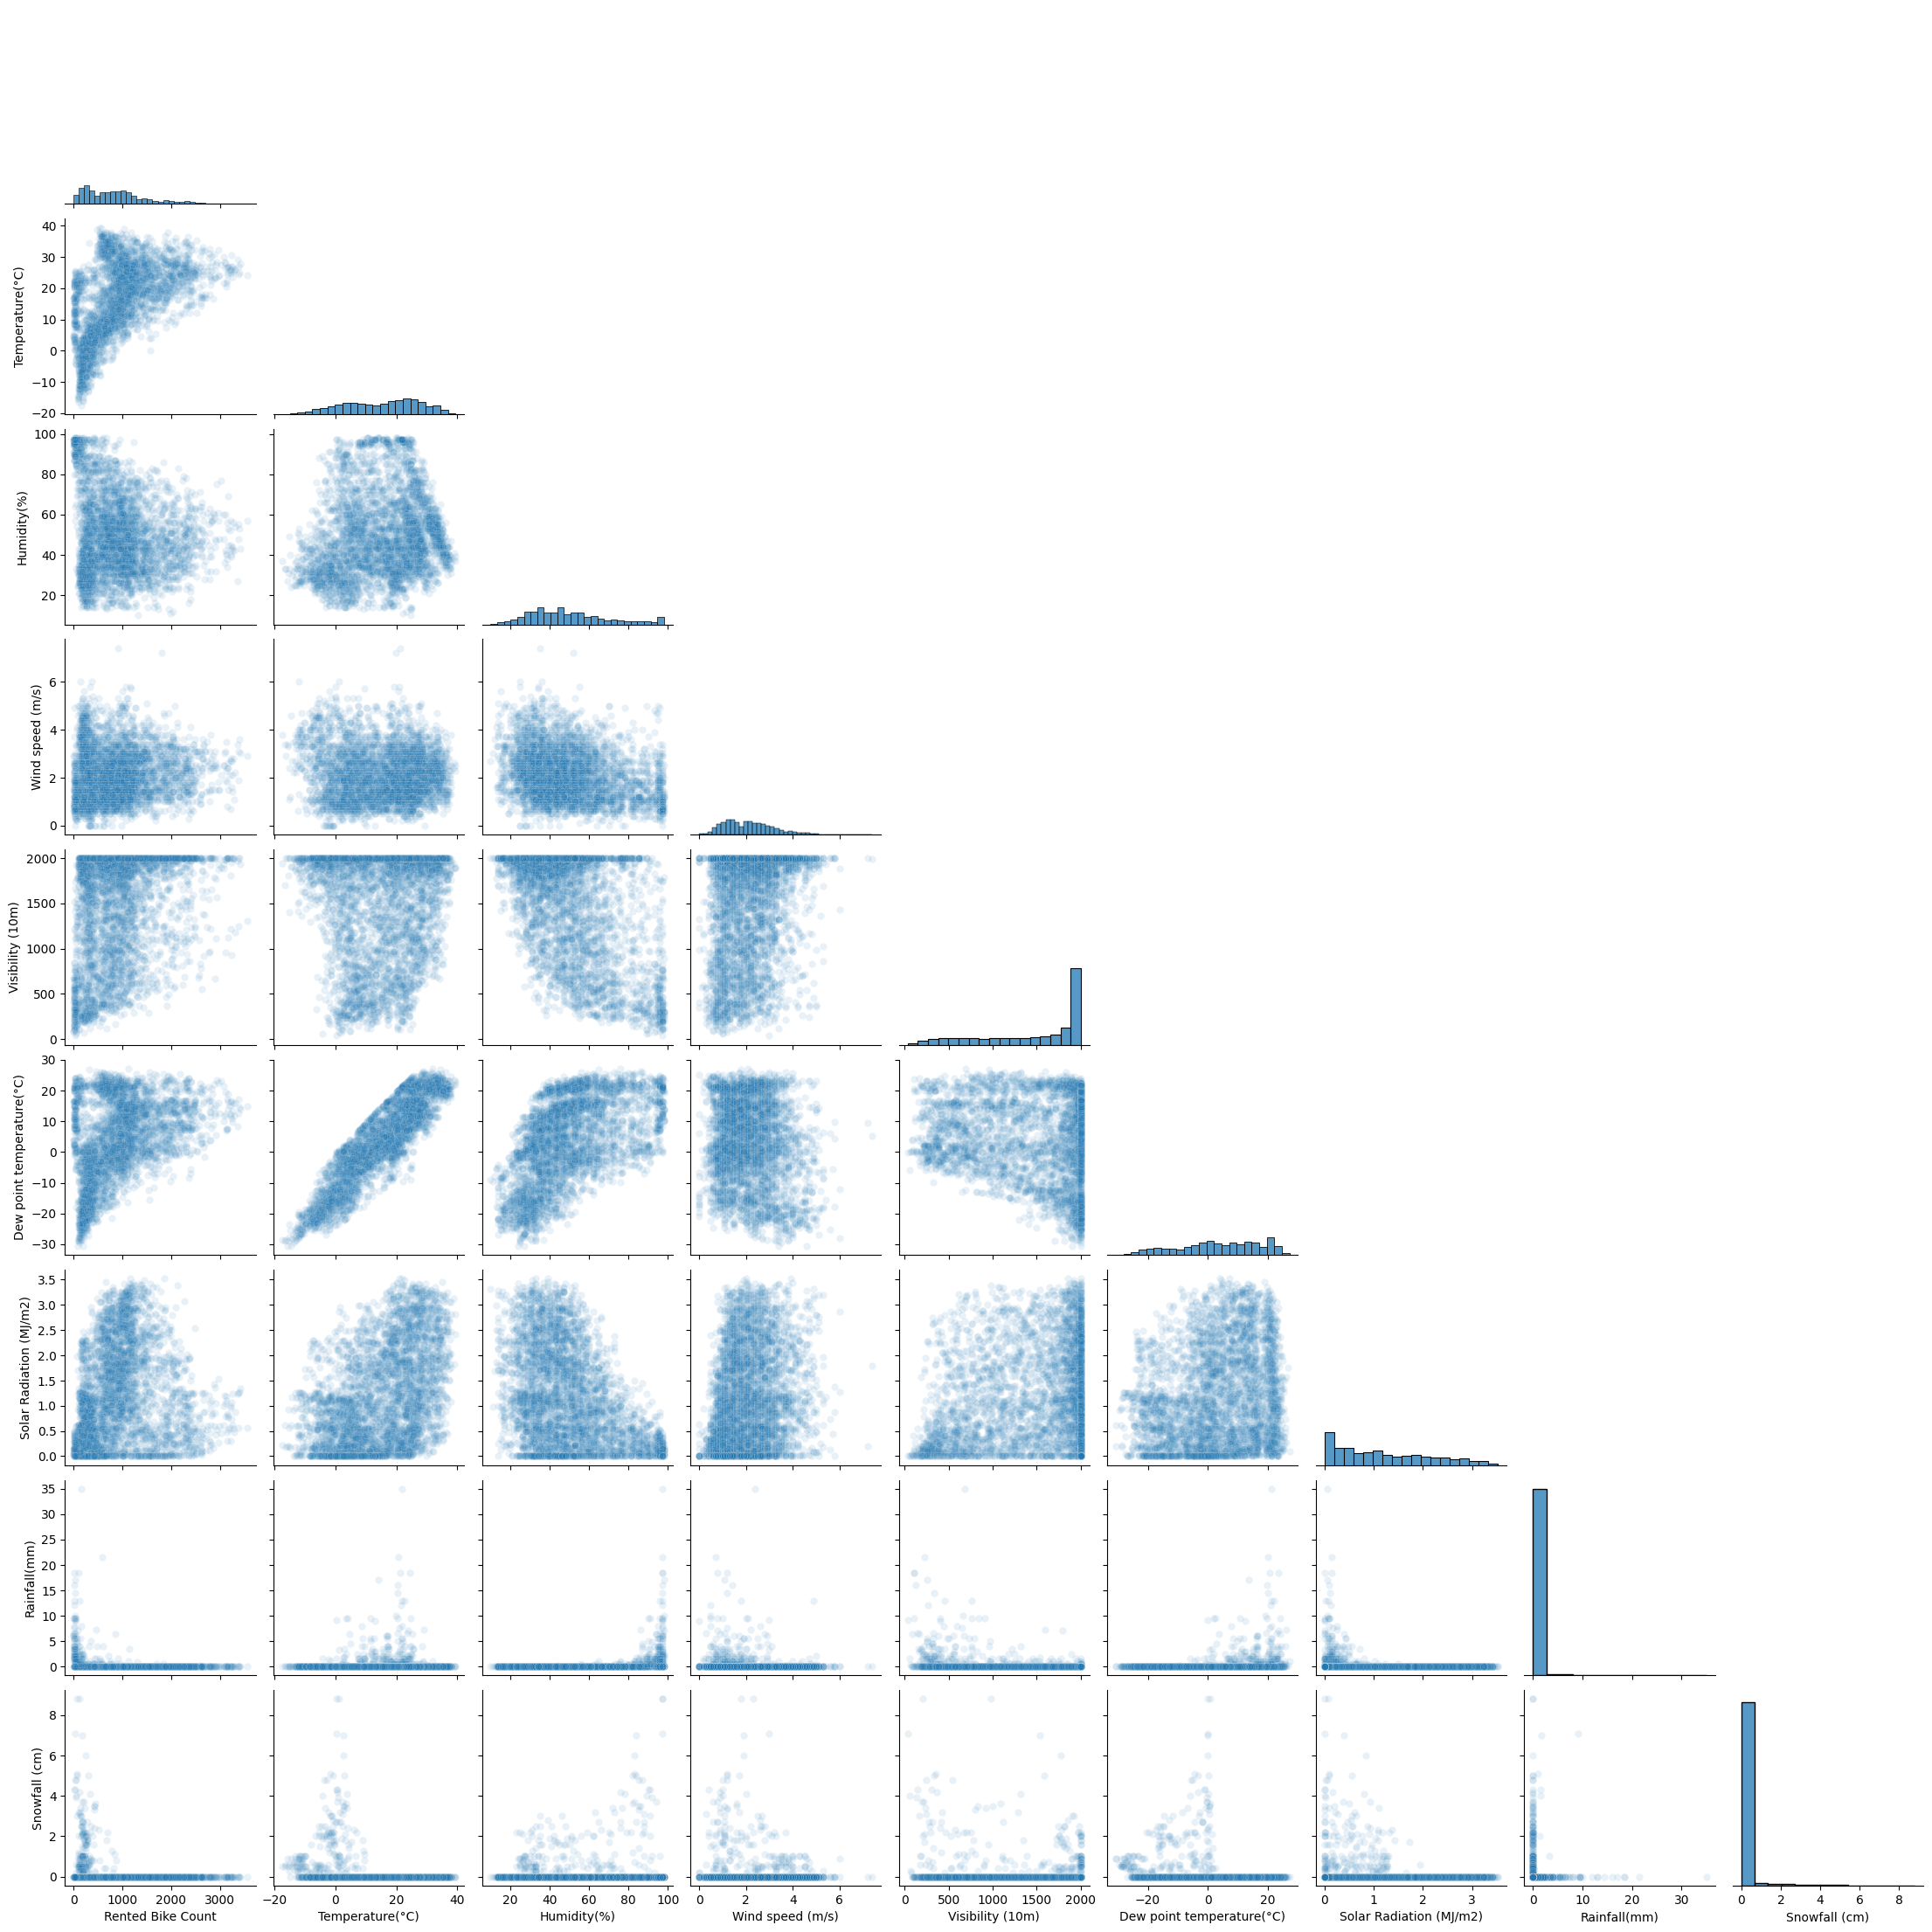

In [103]:
pairsplot = sns.pairplot(#df[(df["Hour"] > 8) & (df["Hour"] < 20)],
             df[(df["Hour"] > 8) & (df["Hour"] < 20)][['Rented Bike Count', 'Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 
                'Visibility (10m)', 'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']] , 
              plot_kws={'alpha':0.1}, corner = True)
             #corner = True, kind="reg" , diag_kind="kde")

### Kategorische Größen

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Seasons', ylabel='count'>

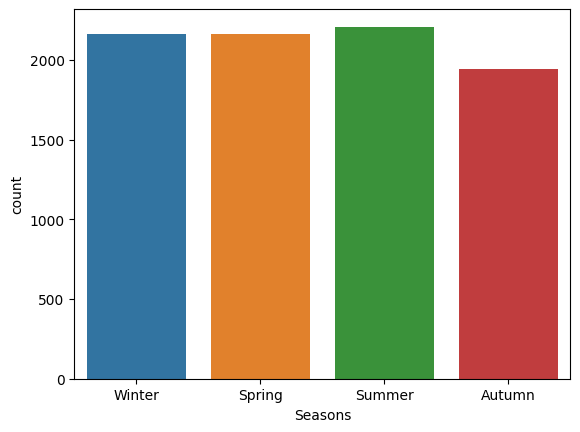

In [104]:
sns.countplot(data=df, x = "Seasons" )

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Holiday', ylabel='count'>

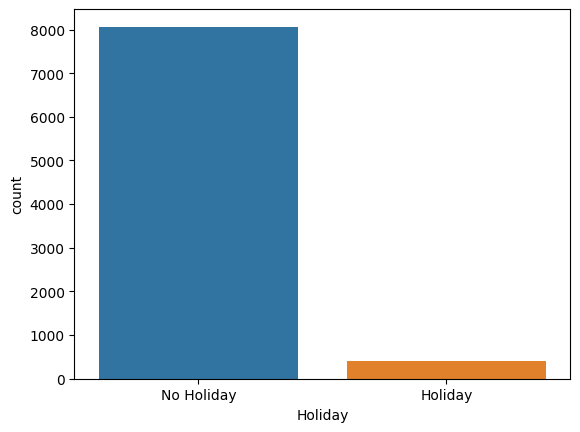

In [105]:
sns.countplot(data=df, x = "Holiday" )

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Functioning Day', ylabel='count'>

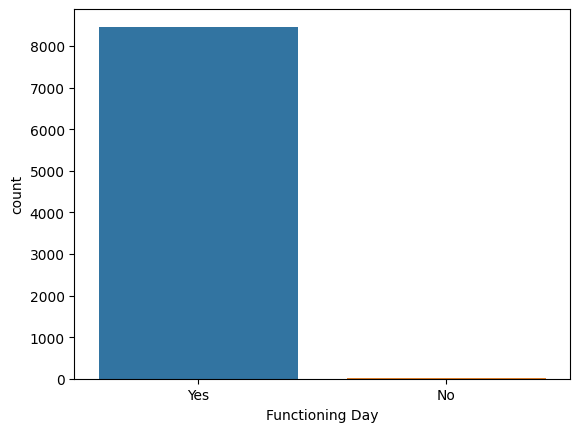

In [106]:
sns.countplot(data=df, x = "Functioning Day" )

In [107]:
pd.crosstab(index=df['Functioning Day'], columns=df['Holiday'])

Holiday,Holiday,No Holiday
Functioning Day,,
No,0,7
Yes,408,8057


### Target in unterschiedlichen Kategorien

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mak

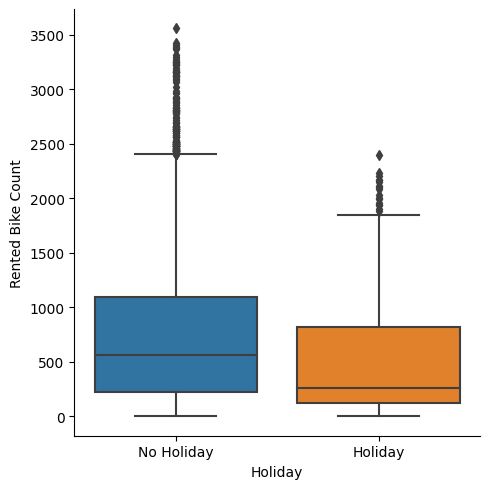

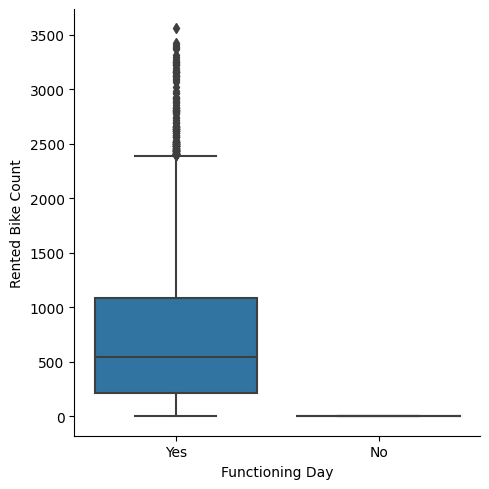

In [108]:
sns.catplot(data = df, x = 'Holiday', y = 'Rented Bike Count', kind = 'box')
sns.catplot(data = df, x = 'Functioning Day', y = 'Rented Bike Count', kind = 'box')


In [109]:
df[df['Functioning Day'] == 'No']['Rented Bike Count'].describe()

count    7.0
mean     0.0
std      0.0
min      0.0
25%      0.0
50%      0.0
75%      0.0
max      0.0
Name: Rented Bike Count, dtype: float64

**Aufgabe:** Finde mittels Visualisierung heraus, ob die Season mit der Anzahl ausgeliehener Farräder korreliert!

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mak

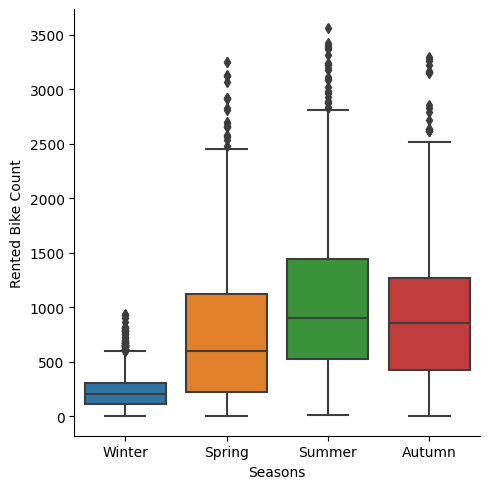

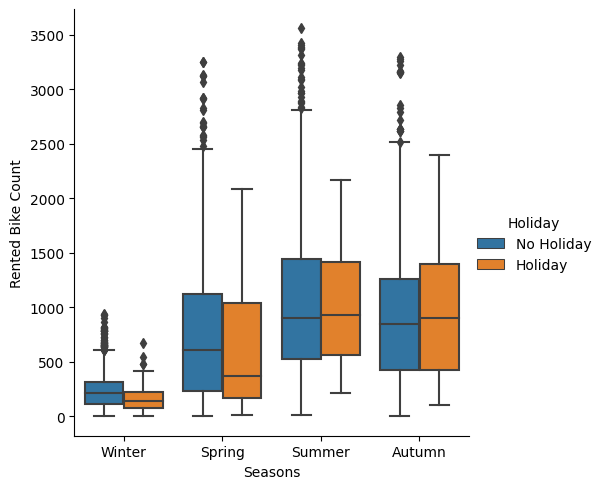

In [110]:
# Antwort: 
sns.catplot(data = df, x = 'Seasons', y = 'Rented Bike Count', kind = 'box') # kind = 'violin', 'box'
sns.catplot(data = df, x = 'Seasons', y = 'Rented Bike Count', kind = 'box', hue = 'Holiday') # kind = 'violin', 'box'

**Aufgabe:** Finde mittels Visualisierung heraus, ob die Stunde mit der Anzahl ausgeliehener Farräder korreliert!

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mak

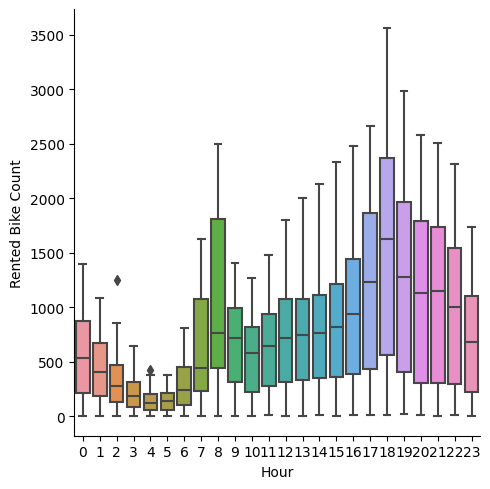

In [111]:
# Antwort: 
sns.catplot(data = df, x = 'Hour', y = 'Rented Bike Count', kind = 'box')
#df.boxplot('Rented Bike Count', by = 'Hour')

**Aufgabe:** Überprüfe die lineare Korrelation potentieller erklärender Variablen untereinander und mit der Anzahl ausgeliehener Farräder!

In [112]:
df.corr(numeric_only=True)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
Rented Bike Count,1.000000,0.425902,0.562112,-0.203161,0.124174,0.212231,0.399134,0.274281,-0.130321,-0.151364
Hour,0.425902,1.000000,0.122327,-0.237153,0.286735,0.103675,0.003828,0.145202,0.012169,-0.021890
Temperature(°C),0.562112,0.122327,1.000000,0.166669,-0.038251,0.028220,0.914382,0.354590,0.052571,-0.217780
Humidity(%),-0.203161,-0.237153,0.166669,1.000000,-0.335840,-0.547951,0.539793,-0.457568,0.239099,0.109772
Wind speed (m/s),0.124174,0.286735,-0.038251,-0.335840,1.000000,0.180172,-0.176507,0.325630,-0.023157,-0.003902
Visibility (10m),0.212231,0.103675,0.028220,-0.547951,0.180172,1.000000,-0.182556,0.153017,-0.171395,-0.122786
Dew point temperature(°C),0.399134,0.003828,0.914382,0.539793,-0.176507,-0.182556,1.000000,0.098019,0.127992,-0.149836
Solar Radiation (MJ/m2),0.274281,0.145202,0.354590,-0.457568,0.325630,0.153017,0.098019,1.000000,-0.075160,-0.073271
Rainfall(mm),-0.130321,0.012169,0.052571,0.239099,-0.023157,-0.171395,0.127992,-0.075160,1.000000,0.008199
Snowfall (cm),-0.151364,-0.021890,-0.217780,0.109772,-0.003902,-0.122786,-0.149836,-0.073271,0.008199,1.000000


<Axes: >

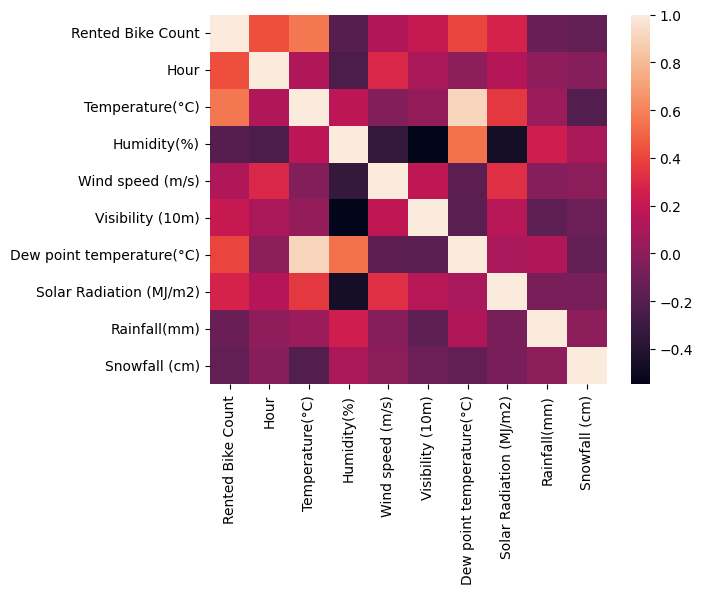

In [113]:
sns.heatmap(df.corr(numeric_only=True))

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


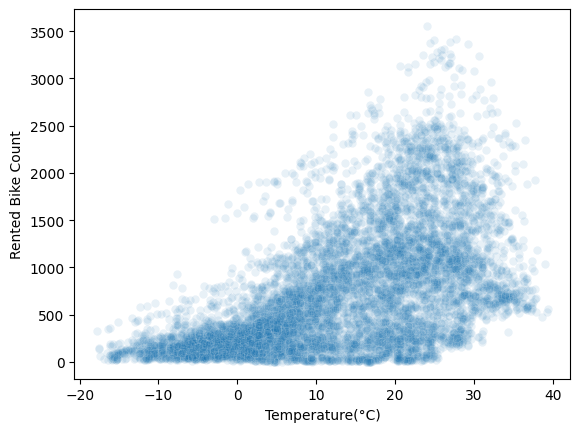

In [114]:
g1 = sns.scatterplot(data = df, y = 'Rented Bike Count', x = 'Temperature(°C)', alpha = 0.1)
#g2 = sns.PairGrid(df, y_vars=['Rented Bike Count'], x_vars=['Temperature'], height=6)
#g2.map(sns.regplot, scatter_kws={'alpha':0.1})

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


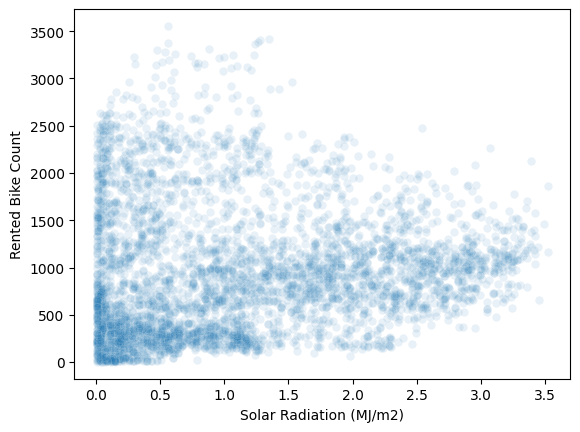

In [115]:
g3 = sns.scatterplot(data = df[df['Solar Radiation (MJ/m2)']>0], y = 'Rented Bike Count', x = 'Solar Radiation (MJ/m2)', alpha = 0.1)

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


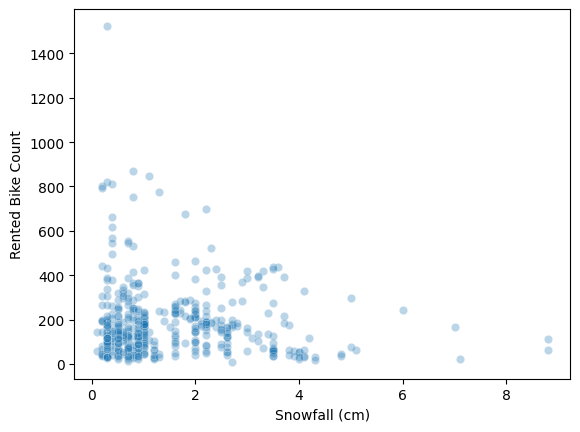

In [116]:
#sns.scatterplot(data = df, y = 'Rented Bike Count', x = 'Snowfall (cm)', alpha = 0.1)
g4 = sns.scatterplot(data = df[df['Snowfall (cm)']>0], y = 'Rented Bike Count', x = 'Snowfall (cm)', alpha = 0.3)

**Aufgabe:** Gehe die weiteren numrischen Größen druch und plotte sie gegen die Anzahl ausgeliehener Fahrräder.

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Wind speed (m/s)', ylabel='Rented Bike Count'>

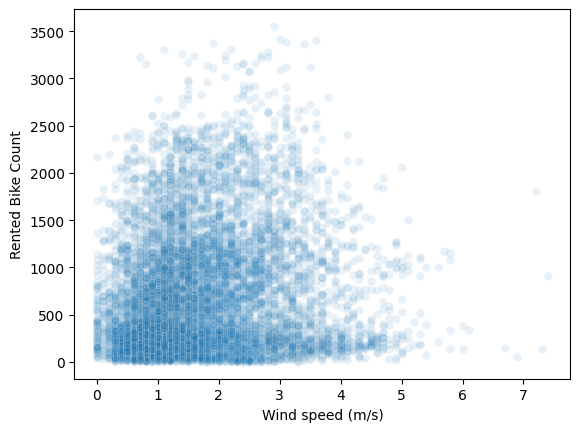

In [117]:
sns.scatterplot(data = df, y = 'Rented Bike Count', x = 'Wind speed (m/s)', alpha = 0.1)

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Dew point temperature(°C)', ylabel='Rented Bike Count'>

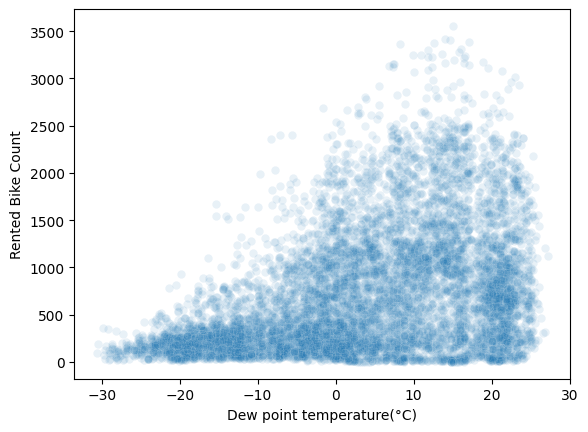

In [118]:
sns.scatterplot(data = df, y = 'Rented Bike Count', x = 'Dew point temperature(°C)', alpha = 0.1)

# Feature Engineering

In [119]:
df['Temp_sq'] = df['Temperature(°C)']*df['Temperature(°C)']
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Temp_sq
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,27.04
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,30.25
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,36.00
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,38.44
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes,36.00


In [120]:
df['Night'] = (df['Hour']>=22) | (df['Hour'] <= 6)
df['Night'].describe()

count      8472
unique        2
top       False
freq       5295
Name: Night, dtype: object

In [121]:
df['Snow'] = df['Snowfall (cm)']>0
df['Snow'].describe()

count      8472
unique        2
top       False
freq       8029
Name: Snow, dtype: object

/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mako6/Library/Caches/pypoetry/virtualenvs/ki-grundlagen-hdp-2023-_qWOVShY-py3.11/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/mak

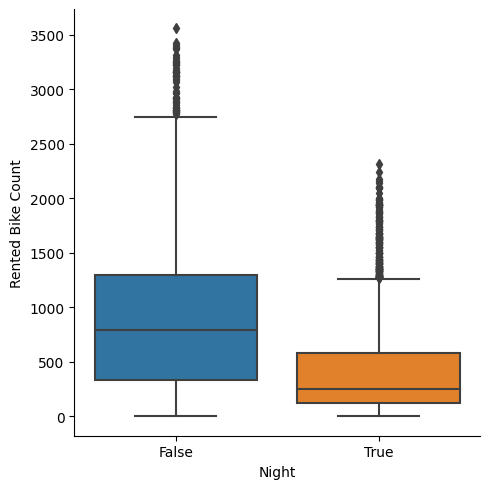

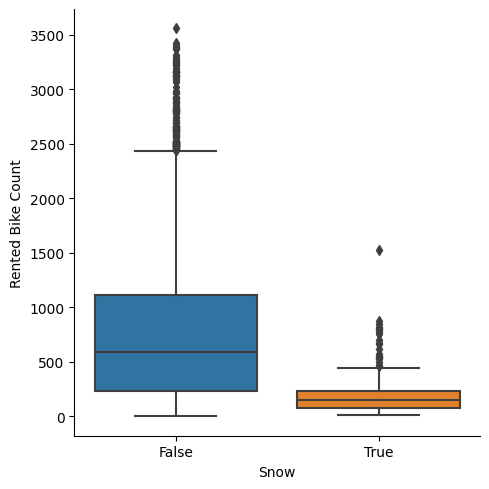

In [122]:
sns.catplot(data = df, x = 'Night', y = 'Rented Bike Count', kind = 'box')
sns.catplot(data = df, x = 'Snow', y = 'Rented Bike Count', kind = 'box')

## One-hot encoding

In [123]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.
    
    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.
    
    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a diction

In [124]:
df_prep1 = pd.get_dummies(df, columns=['Seasons', 'Holiday', 'Functioning Day', 'Snow', 'Night'], drop_first=True)
df_prep1.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temp_sq,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Snow_True,Night_True
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,27.04,False,False,True,True,True,False,True
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,30.25,False,False,True,True,True,False,True
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,36.00,False,False,True,True,True,False,True
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,38.44,False,False,True,True,True,False,True
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,36.00,False,False,True,True,True,False,True


In [125]:
df_prep1.describe(include = 'all')

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temp_sq,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_No Holiday,Functioning Day_Yes,Snow_True,Night_True
count,8472,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472.000000,8472,8472,8472,8472,8472,8472,8472
unique,353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,2,2,2,2,2
top,01/12/2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,False,False,True,True,False,False
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6312,6264,6312,8064,8465,8029,5295
mean,NaN,728.554533,11.500000,12.774304,58.174575,1.726558,1433.811615,3.954297,0.567398,0.151475,0.077620,309.573139,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,642.427458,6.922595,12.099900,20.498661,1.034194,609.070630,13.240880,0.868040,1.130353,0.443885,321.749469,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,214.000000,5.750000,3.000000,42.000000,0.900000,935.000000,-5.100000,0.000000,0.000000,0.000000,33.640000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,541.500000,11.500000,13.500000,57.000000,1.500000,1689.500000,4.700000,0.010000,0.000000,0.000000,190.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,1083.250000,17.250000,22.700000,74.000000,2.300000,2000.000000,15.200000,0.930000,0.000000,0.000000,515.290000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df_prep2 = pd.get_dummies(df_prep1, columns=['Hour'], drop_first=True)
y = df_prep2['Rented Bike Count'] > 1000
X = df_prep2.drop(columns = ['Date', 'Rented Bike Count'])
X.head()

,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Temp_sq,Seasons_Spring,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,27.04,False,...,False,False,False,False,False,False,False,False,False,False
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,30.25,False,...,False,False,False,False,False,False,False,False,False,False
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,36.00,False,...,False,False,False,False,False,False,False,False,False,False
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,38.44,False,...,False,False,False,False,False,False,False,False,False,False
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,36.00,False,...,False,False,False,False,False,False,False,False,False,False


# Setup an ML Pipeline

In [127]:
# !pip install sklearn

In [128]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

from sklearn.preprocessing import StandardScaler
#from sklearn.ensemble import RandomForestRegressor

## Transform and Scale

In [129]:
X.columns

Index(['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temp_sq',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Snow_True', 'Night_True',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [130]:
# Scale numeric inputs with standard scaler
numScaling_col = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temp_sq']

preprocessor = make_column_transformer(
        (StandardScaler(), numScaling_col),
        remainder="passthrough"
    )

In [131]:
# Take log from target
def norm_target(x):
    return np.log(x+1)

def renorm_target(y):
    x = np.exp(y)-1
    return x

## Split, Train, Test and Evaluate

In [132]:
df_prep2.columns

Index(['Date', 'Rented Bike Count', 'Temperature(°C)', 'Humidity(%)',
       'Wind speed (m/s)', 'Visibility (10m)', 'Dew point temperature(°C)',
       'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)', 'Temp_sq',
       'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter',
       'Holiday_No Holiday', 'Functioning Day_Yes', 'Snow_True', 'Night_True',
       'Hour_1', 'Hour_2', 'Hour_3', 'Hour_4', 'Hour_5', 'Hour_6', 'Hour_7',
       'Hour_8', 'Hour_9', 'Hour_10', 'Hour_11', 'Hour_12', 'Hour_13',
       'Hour_14', 'Hour_15', 'Hour_16', 'Hour_17', 'Hour_18', 'Hour_19',
       'Hour_20', 'Hour_21', 'Hour_22', 'Hour_23'],
      dtype='object')

In [133]:
# Data Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    train_size=None, test_size=0.15, # default: 0.25
    shuffle = True,
    stratify = y,
    random_state=42
)

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [134]:
from sklearn.linear_model import LogisticRegression

In [135]:
## Model Pipeline Setup
model = make_pipeline(
    preprocessor,
    #TransformedTargetRegressor(
    #    regressor = 
    LogisticRegression(max_iter=1000), #100
       # func = norm_target,
       # inverse_func = renorm_target
    #),
)

In [136]:
# Train, Test and Evaluate
model.fit(X_train, y_train)
#model.predict_proba(X_test)
model.score(X_test, y_test) #score method is always accuracy for classification and r2 score for regression.

0.9071597167584579

In [137]:
# Evaluate with MAE
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE_test = 100*accuracy_score(y_test,y_pred_test)
MAE_train = 100*accuracy_score(y_train,y_pred_train)
print(f"Acc (train): {MAE_train: .2f}")
print(f"Acc (test):  {MAE_test: .2f}")

Acc (train):  90.46
Acc (test):   90.72


## Other Model: Gradient Boosting Tree

In [138]:
from sklearn.ensemble import GradientBoostingClassifier

In [139]:
## Model Pipeline Setup
model = make_pipeline(
    preprocessor,
    GradientBoostingClassifier(n_estimators=100, 
                                             learning_rate=0.1, 
                                             max_depth=6, 
                                             random_state=0),
      #  func = norm_target,
      #  inverse_func = renorm_target
    #),
    #LassoCV(cv=StratifiedKFold(n_splits=5)) ???
)

In [140]:
# Train, Test and Evaluate
model.fit(X_train, y_train)
#model.predict_proba(X_test)
model.score(X_test, y_test) #score method is always accuracy for classification and r2 score for regression.

0.918174665617624

In [141]:
# Evaluate with MAE
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE_test = 100*accuracy_score(y_test,y_pred_test)
MAE_train = 100*accuracy_score(y_train,y_pred_train)
print(f"Acc (train): {MAE_train: .2f}")
print(f"Acc (test):  {MAE_test: .2f}")

Acc (train):  96.97
Acc (test):   91.82


## Other Model: Decision Tree

In [142]:
from sklearn import tree
from sklearn.tree import plot_tree

In [143]:
## Model Pipeline Setup
#model = make_pipeline(
#    preprocessor,
#    TransformedTargetRegressor(
#        regressor= tree.DecisionTreeRegressor(max_depth = 6),
#       # func = norm_target,
#       # inverse_func = renorm_target
#    ),
#)

model = tree.DecisionTreeClassifier(max_depth = 6)


In [144]:
# Train, Test and Evaluate
model.fit(X_train, y_train)
#model.predict_proba(X_test)
model.score(X_test, y_test) #score method is always accuracy for classification and r2 score for regression.

0.8827694728560189

In [145]:
# Evaluate with MAE
y_pred_test = model.predict(X_test)
y_pred_train = model.predict(X_train)

MAE_test = 100*accuracy_score(y_test,y_pred_test)
MAE_train = 100*accuracy_score(y_train,y_pred_train)
print(f"Acc (train): {MAE_train: .2f}")
print(f"Acc (test):  {MAE_test: .2f}")

Acc (train):  90.22
Acc (test):   88.28


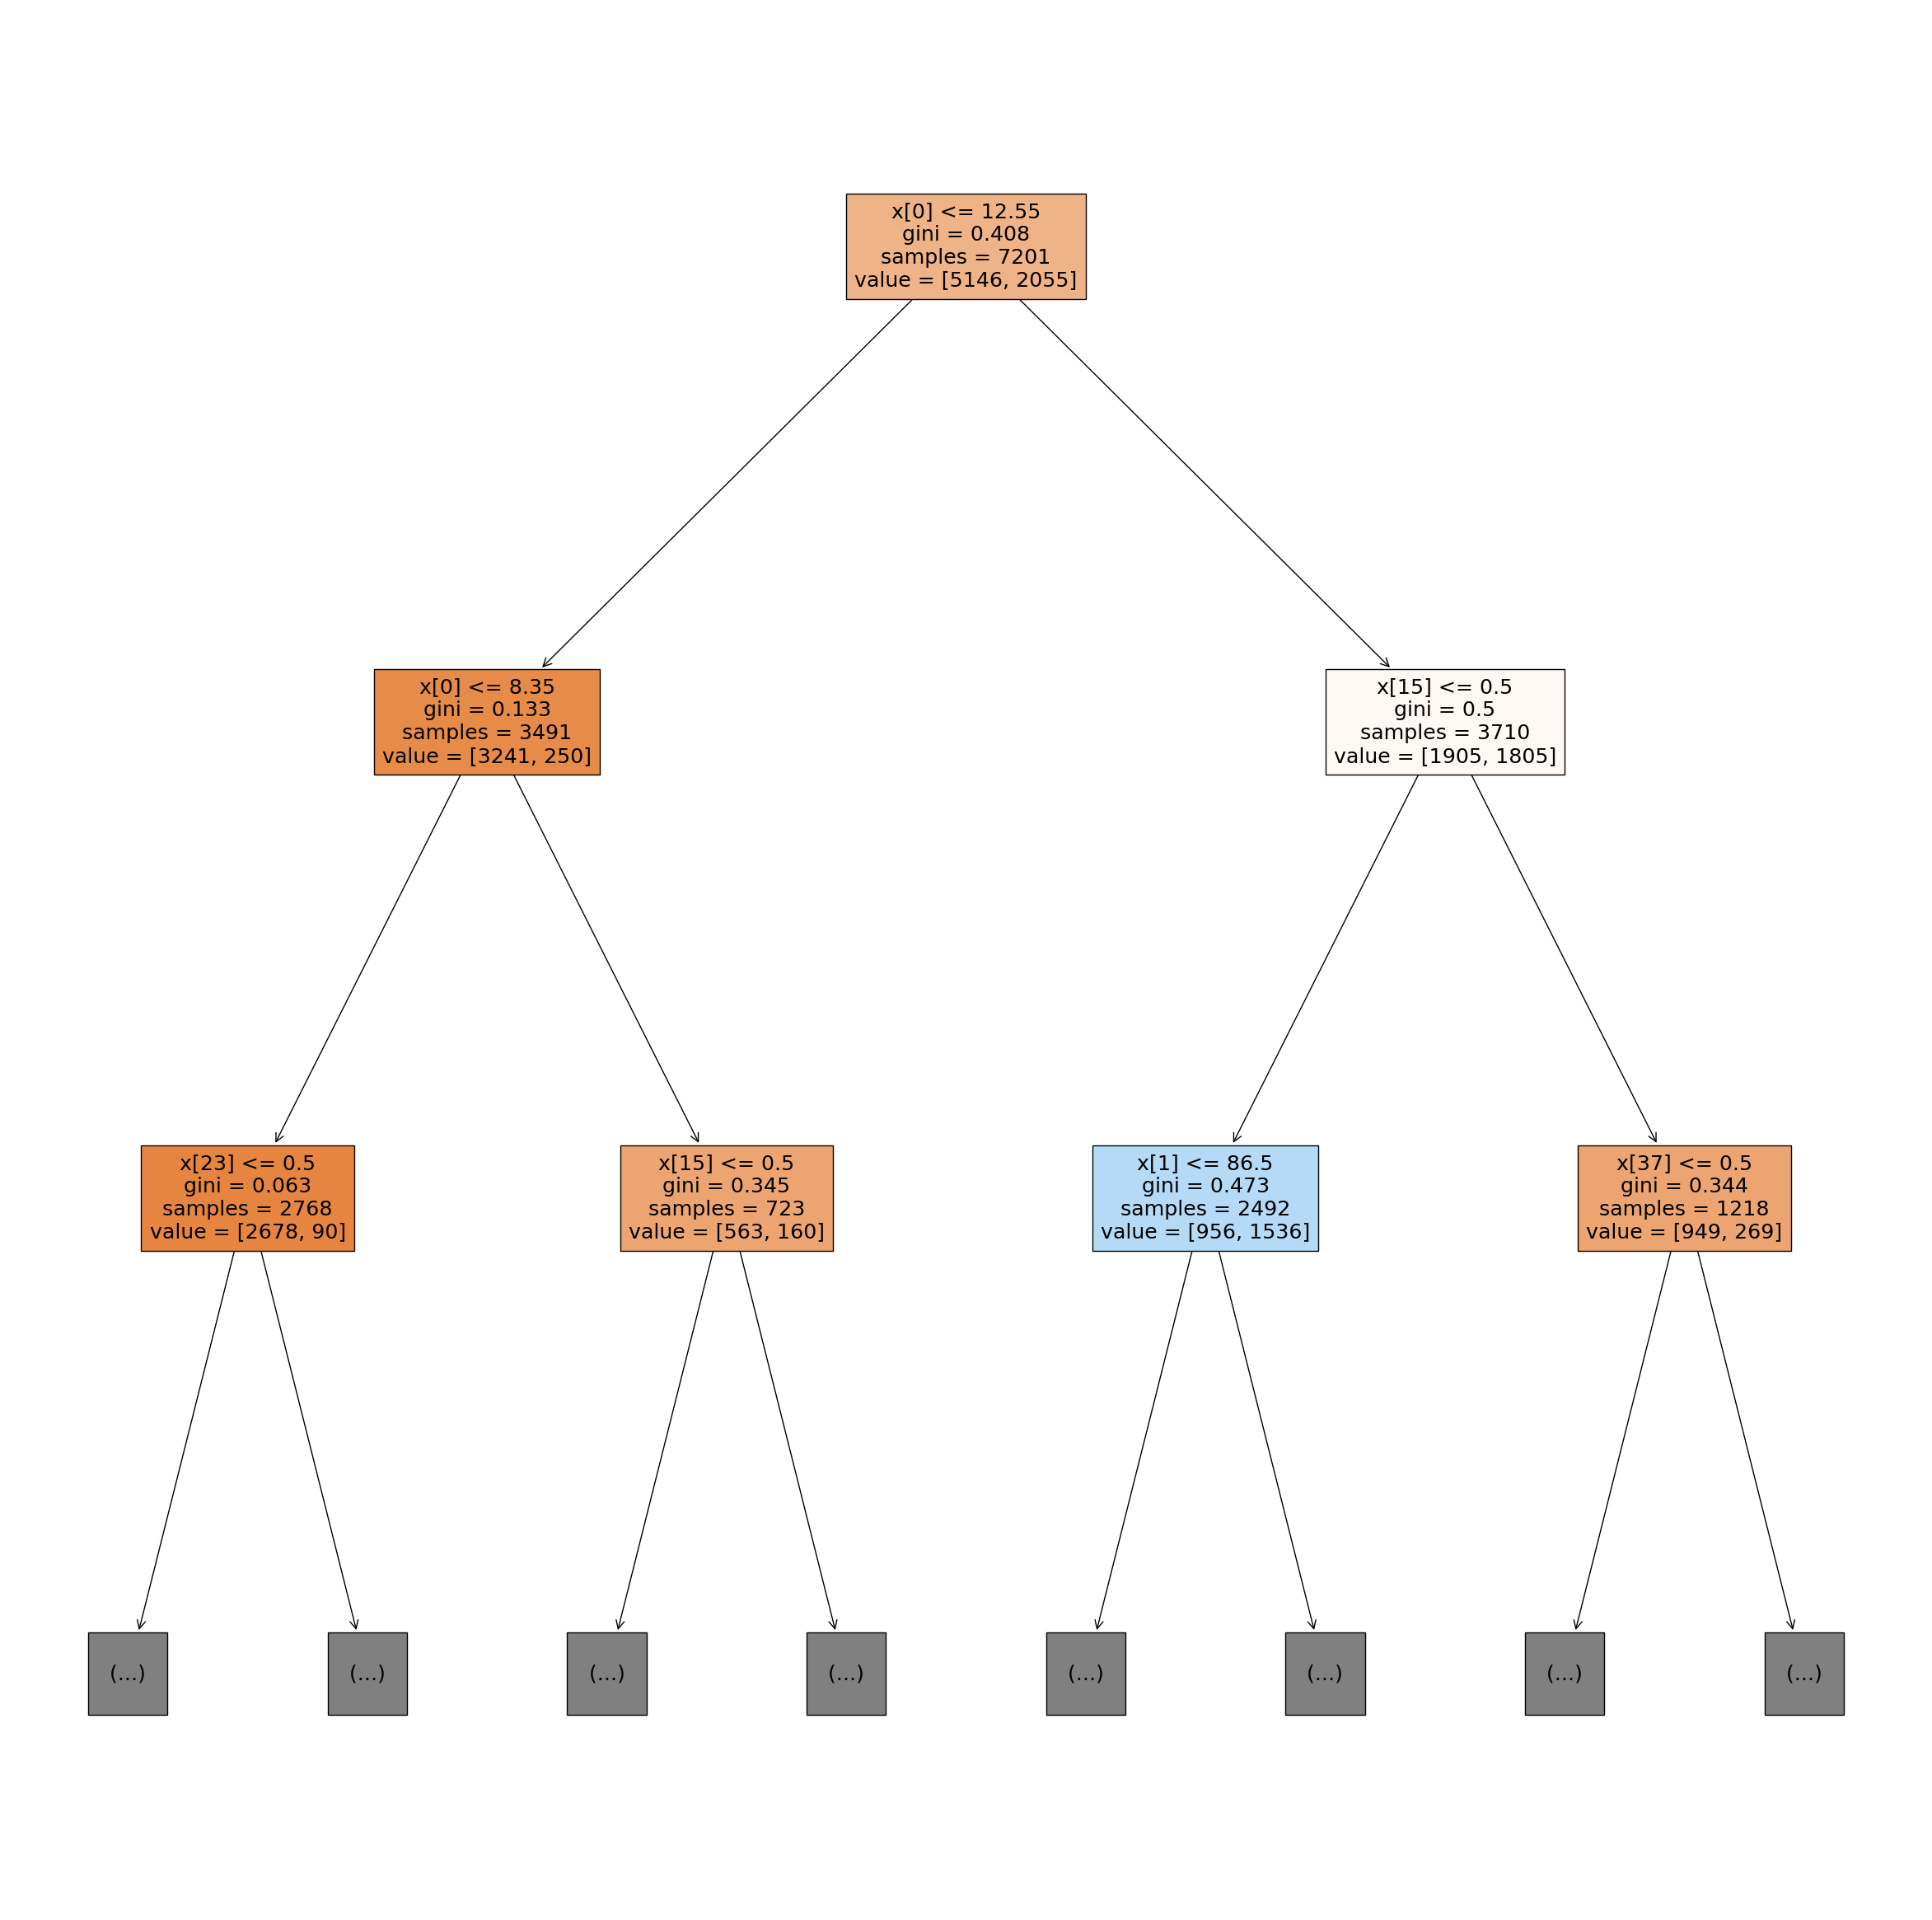

['Temperature(°C)',
 'Humidity(%)',
 'Wind speed (m/s)',
 'Visibility (10m)',
 'Dew point temperature(°C)',
 'Solar Radiation (MJ/m2)',
 'Rainfall(mm)',
 'Snowfall (cm)',
 'Temp_sq',
 'Seasons_Spring',
 'Seasons_Summer',
 'Seasons_Winter',
 'Holiday_No Holiday',
 'Functioning Day_Yes',
 'Snow_True',
 'Night_True',
 'Hour_1',
 'Hour_2',
 'Hour_3',
 'Hour_4',
 'Hour_5',
 'Hour_6',
 'Hour_7',
 'Hour_8',
 'Hour_9',
 'Hour_10',
 'Hour_11',
 'Hour_12',
 'Hour_13',
 'Hour_14',
 'Hour_15',
 'Hour_16',
 'Hour_17',
 'Hour_18',
 'Hour_19',
 'Hour_20',
 'Hour_21',
 'Hour_22',
 'Hour_23']

In [146]:
plt.figure(figsize=(30, 30)) # Resize figure
plot_tree(model, filled=True,max_depth = 2)
plt.show()

list(X.columns)

# Visualize Model Fit

Text(0.5, 0, 'Truths')

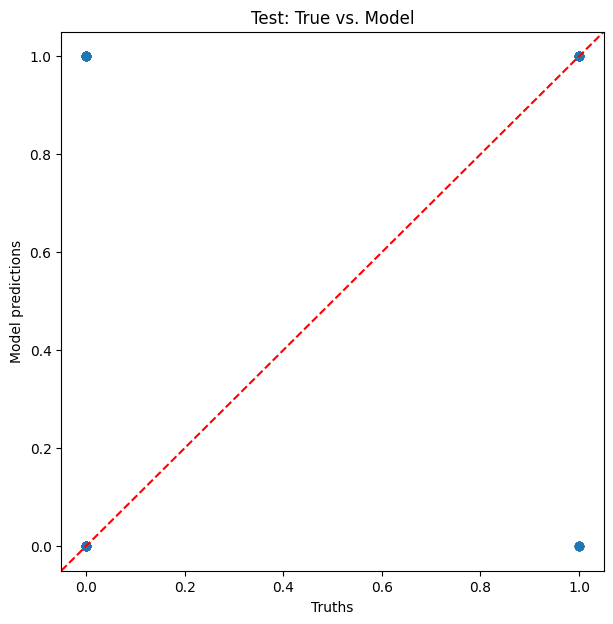

In [147]:
fig, ax = plt.subplots(figsize=(7, 7))
plt.scatter(y_test, y_pred_test, alpha = 0.1)

ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")

plt.title("Test: True vs. Model")
plt.ylabel("Model predictions")
plt.xlabel("Truths")
#plt.xlim([0, 1000])
#_ = plt.ylim([0, 1000])